In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\resume\uber-raw-data-sep14.csv")

In [6]:
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 

In [5]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [7]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)

In [8]:
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())

In [9]:
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)

In [10]:
print(data.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


In [11]:
print(data.head(20))

             Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0  2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1  2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2  2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3  2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4  2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0
5  2014-09-01 00:12:00  40.6735 -73.9918  B02512    1        0     0
6  2014-09-01 00:15:00  40.7471 -73.6472  B02512    1        0     0
7  2014-09-01 00:16:00  40.6613 -74.2691  B02512    1        0     0
8  2014-09-01 00:32:00  40.3745 -73.9999  B02512    1        0     0
9  2014-09-01 00:33:00  40.7633 -73.9773  B02512    1        0     0
10 2014-09-01 00:33:00  40.7467 -73.6131  B02512    1        0     0
11 2014-09-01 00:37:00  40.8105 -73.9600  B02512    1        0     0
12 2014-09-01 00:38:00  40.6790 -74.0111  B02512    1        0     0
13 2014-09-01 00:39:00  40.4023 -7

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day', ylabel='Density'>

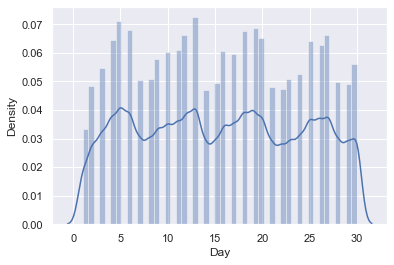

In [12]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Day"])

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Density'>

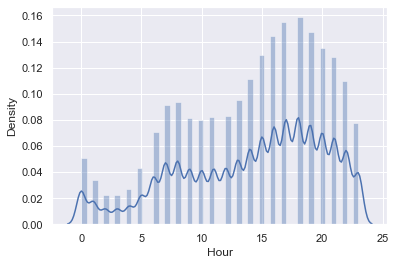

In [13]:
sns.distplot(data["Hour"])

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekday', ylabel='Density'>

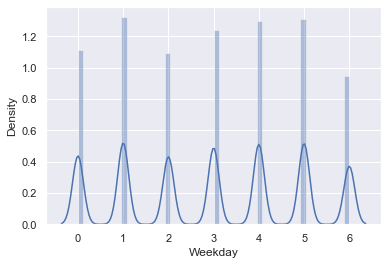

In [14]:
sns.distplot(data["Weekday"])

In [15]:
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))

In [16]:
df = df.unstack()

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

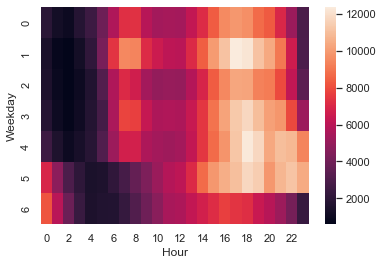

In [17]:
sns.heatmap(df, annot=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


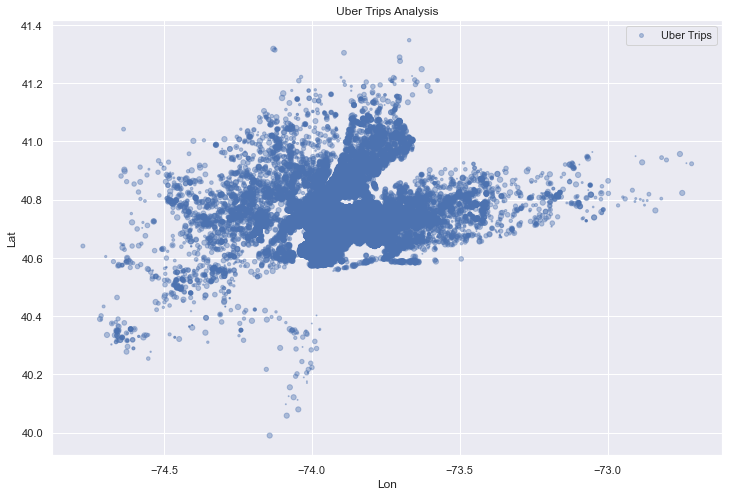

In [18]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()